# DATA COMPREHESION

## DATA MINING

In [1]:
import os
from dotenv import load_dotenv
import time
load_dotenv()
api_key = os.getenv("API_KEY")

In [2]:
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
from pathlib import Path

In [8]:
#load json file
def load_json(filepath,filename):
    with open(filepath+filename, 'r') as f:
        data = json.load(f)
    return data

In [6]:
class CoinGeckoClass:
    def __init__(self):
        self.api_key="CG-4iykpMQk3bQNCYrS4pMjmmXJ"
        self.url_base="https://api.coingecko.com/api/v3/"
        self.headers={
            "accept": "application/json",
            "x-cg-api-key":"CG-4gmHK6qGSZHmTp1Uh7ThLwr6"
            }
        self.session = Session()
        self.session.headers.update(self.headers)

        
    def __catch_error(self, url):
        try:
            response = self.session.get(url)
            data = json.loads(response.text)
            return data
        except (ConnectionError, Timeout, TooManyRedirects) as e:
            print(e)
    
    def get_categories(self):
        url = 'coins/categories'
        return self.__catch_error(self.url_base+url)
    
    def get_asset_platforms(self):
        url = 'asset_platforms'
        return self.__catch_error(self.url_base+url)
    
    def get_coin_list(self):
        url = 'coins/list?include_platform=true'
        return self.__catch_error(self.url_base+url)
    
    def get_coin_list_with_market_data(self,category):
        url = f"coins/markets?vs_currency=usd&category={category}&per_page=250&sparkline=true&price_change_percentage=1h%2C24h%2C7d&precision=full"
        return self.__catch_error(self.url_base+url)
    
    def get_exchange_list(self):
        url = 'exchanges/list'
        return self.__catch_error(self.url_base+url)

    def save_json(self,data,filepath,filename):
        with open(filepath+filename, 'w') as f:
            json.dump(data, f)

     

    def ping(self):
        url=self.url_base+"ping"
        response = self.session.get(url)
        data = json.loads(response.text)
        print(data)

In [13]:
api = CoinGeckoClass()
api.ping()

{'gecko_says': '(V3) To the Moon!'}


In [18]:
categories=api.get_categories()
api.save_json(categories,"data/raw/","categories.json")

In [22]:
asset_platforms=api.get_asset_platforms()
api.save_json(asset_platforms,"data/raw/","asset_platforms.json")

In [25]:
coin_list=api.get_coin_list()
api.save_json(coin_list,"data/raw/","coin_list.json")

### rwa

In [28]:
coin_list_with_market_data=api.get_coin_list_with_market_data("real-world-assets-rwa")
api.save_json(coin_list_with_market_data,"data/raw/","coin_list_with_market_data_real_world_assets_rwa.json")

### gaming

In [30]:
coin_list_with_market_data=api.get_coin_list_with_market_data("gaming")
api.save_json(coin_list_with_market_data,"data/raw/","coin_list_with_market_data_gaming.json")

In [31]:
coin_list_with_market_data=api.get_coin_list_with_market_data("play-to-earn")
api.save_json(coin_list_with_market_data,"data/raw/coin_list_with_market_data/","play_to_earn.json")


In [32]:
coin_list_with_market_data=api.get_coin_list_with_market_data("gaming-blockchains")
api.save_json(coin_list_with_market_data,"data/raw/coin_list_with_market_data/","gaming_blockchains.json")

In [33]:
coin_list_with_market_data=api.get_coin_list_with_market_data("gaming-utility-token")
api.save_json(coin_list_with_market_data,"data/raw/coin_list_with_market_data/","gaming_utility_token.json")

In [34]:
coin_list_with_market_data=api.get_coin_list_with_market_data("gaming-governance-token")
api.save_json(coin_list_with_market_data,"data/raw/coin_list_with_market_data/","gaming_governance_token.json")

In [35]:
coin_list_with_market_data=api.get_coin_list_with_market_data("gaming-platform")
api.save_json(coin_list_with_market_data,"data/raw/coin_list_with_market_data/","gaming_platform.json")

In [36]:
coin_list_with_market_data=api.get_coin_list_with_market_data("on-chain-gaming")
api.save_json(coin_list_with_market_data,"data/raw/coin_list_with_market_data/","on_chain_gaming.json")

### memes

In [4]:
categories = load_json("data/raw/","categories.json")

In [5]:
halving_03_categories=pd.DataFrame(categories)

In [6]:
halving_03_categories_meme = halving_03_categories.loc[halving_03_categories['content'].apply(lambda x : "meme" in str(x).lower())]

In [7]:
halving_03_categories_meme["id"].to_list()

['meme-token',
 'dog-themed-coins',
 'elon-musk-inspired-coins',
 'solana-meme-coins',
 'cat-themed-coins',
 'base-meme-coins',
 'presale-meme-coins',
 'politifi',
 'ai-meme-coins',
 'parody-meme-coins',
 'ton-meme-coins',
 'anime-themed-coins',
 'duck-themed-coins']

In [15]:
for category in halving_03_categories_meme["id"].to_list():
    coin_list_with_market_data=api.get_coin_list_with_market_data(category)
    api.save_json(coin_list_with_market_data,"data/raw/coin_list_with_market_data/memes/",f"{category.replace('-','_')}.json")

### IA

In [107]:
coin_list_with_market_data=api.get_coin_list_with_market_data("artificial-intelligence")
api.save_json(coin_list_with_market_data,"data/raw/coin_list_with_market_data/AI/","artificial_intelligence.json")

### CEX TOKENS

In [88]:
coin_list_with_market_data=api.get_coin_list_with_market_data("centralized-exchange-token-cex")
api.save_json(coin_list_with_market_data,"data/raw/coin_list_with_market_data/","centralized_exchange_token_cex.json")


In [93]:
data_cex=load_json("data/raw/coin_list_with_market_data/","centralized_exchange_token_cex.json")

In [95]:
len(data_cex)

42

### exchanges

In [74]:
exchange_list=api.get_exchange_list()
api.save_json(exchange_list,"data/raw/","exchange_list.json")

### clasificando tokens por clase

#### gaming

In [27]:
#load gaming json files
data_folder = Path("data/raw/coin_list_with_market_data/gaming/")
gaming_files = [file for file in data_folder.iterdir() if file.is_file()]
# to string list

In [28]:
halving_03_all_tokens_gaming = pd.DataFrame()
for file in gaming_files:
    json_file=load_json("data/raw/coin_list_with_market_data/gaming/",file.name)
    halving_03 = pd.DataFrame(json_file)
    halving_03 = halving_03[['id','symbol','name']]
    halving_03['class']=1
    halving_03_all_tokens_gaming = pd.concat([halving_03_all_tokens_gaming,halving_03])
    

In [29]:
halving_03_all_tokens_gaming.drop_duplicates(subset=['id'],inplace=True)

In [30]:
#numeor de toknens gaming
len(halving_03_all_tokens_gaming)

329

#### ia

In [31]:
data_folder = Path("data/raw/coin_list_with_market_data/AI/")
files = [file for file in data_folder.iterdir() if file.is_file()]

In [32]:
halving_03_all_tokens_ai = pd.DataFrame()
for file in files:
    json_file=load_json("data/raw/coin_list_with_market_data/AI/",file.name)
    halving_03 = pd.DataFrame(json_file)
    halving_03 = halving_03[['id','symbol','name']]
    halving_03['class']=0
    halving_03_all_tokens_ai = pd.concat([halving_03_all_tokens_ai,halving_03])

In [41]:
len(halving_03_all_tokens_ai)

166

#### memes

In [33]:
data_folder = Path("data/raw/coin_list_with_market_data/memes/")
files = [file for file in data_folder.iterdir() if file.is_file()]

In [34]:
halving_03_all_tokens_memes = pd.DataFrame()
for file in files:
    json_file=load_json("data/raw/coin_list_with_market_data/memes/",file.name)
    halving_03 = pd.DataFrame(json_file)
    halving_03 = halving_03[['id','symbol','name']]
    halving_03['class']=3
    halving_03_all_tokens_memes = pd.concat([halving_03_all_tokens_memes,halving_03])

In [35]:
halving_03_all_tokens_memes.duplicated(subset=['id']).sum()

226

In [36]:
halving_03_all_tokens_memes.drop_duplicates(subset=['id'],inplace=True)

In [40]:
len(halving_03_all_tokens_memes)

414

### rwa

In [37]:
data_folder = Path("data/raw/coin_list_with_market_data/rwa/")
files = [file for file in data_folder.iterdir() if file.is_file()]

In [38]:
halving_03_all_tokens_rwa = pd.DataFrame()
for file in files:
    json_file=load_json("data/raw/coin_list_with_market_data/rwa/",file.name)
    halving_03 = pd.DataFrame(json_file)
    halving_03 = halving_03[['id','symbol','name']]
    halving_03['class']=2
    halving_03_all_tokens_rwa = pd.concat([halving_03_all_tokens_rwa,halving_03])

In [39]:
len(halving_03_all_tokens_rwa)

131

In [44]:
halving_03_all_tokens  = pd.concat([halving_03_all_tokens_gaming,halving_03_all_tokens_ai,halving_03_all_tokens_memes,halving_03_all_tokens_rwa])

In [45]:
halving_03_all_tokens.duplicated(subset=['id']).sum() # observamos que existen tokenes que tienen  mas de una class 

21

In [46]:
halving_03_all_tokens.to_csv("data/clean/halving_03_all_tokens.csv",index=False)

In [22]:
halving_03_all_tokens = pd.read_csv("data/clean/halving_03_all_tokens.csv")

In [23]:
halving_03_all_tokens.head()

,id,symbol,name,class
0,immutable-x,imx,Immutable,1
1,floki,floki,FLOKI,1
2,gala,gala,GALA,1
3,beam-2,beam,Beam,1
4,axie-infinity,axs,Axie Infinity,1


In [9]:
len(halving_03_all_tokens)

1040

In [15]:
## is in exchange centralized
exchange_list=load_json("data/raw/coin_list_with_market_data/","centralized_exchange_token_cex.json")
halving_03_exchange_list = pd.DataFrame(exchange_list)

In [17]:
halving_03_exchange_list = halving_03_exchange_list[['id','name']]

In [24]:
## if id is in exchange centralized centralizaed true
halving_03_all_tokens['centralized']=halving_03_all_tokens['id'].apply(lambda x: 1 if x in halving_03_exchange_list['id'].to_list() else 0)

In [26]:
halving_03_all_tokens[halving_03_all_tokens['centralized']==1].count().sum()

0

In [27]:
halving_03_all_tokens.head()

,id,symbol,name,class,centralized
0,immutable-x,imx,Immutable,1,0
1,floki,floki,FLOKI,1,0
2,gala,gala,GALA,1,0
3,beam-2,beam,Beam,1,0
4,axie-infinity,axs,Axie Infinity,1,0


In [29]:
token_list_json = load_json("data/raw/","coin_list.json")
halving_03_token_list = pd.DataFrame(token_list_json)

In [30]:
halving_03_token_list.head()

,id,symbol,name,platforms
0,01coin,zoc,01coin,{}
1,0chain,zcn,Zus,{'ethereum': '0xb9ef770b6a5e12e45983c5d8054525...
2,0-knowledge-network,0kn,0 Knowledge Network,{'ethereum': '0x4594cffbfc09bc5e7ecf1c2e1c1e24...
3,0-mee,ome,O-MEE,{'ethereum': '0xbd89b8d708809e7022135313683663...
4,0vix-protocol,vix,0VIX Protocol,{}


In [31]:
halving_03_token_list['platforms']=halving_03_token_list['platforms'].apply(lambda x: len(x.keys()))

In [32]:
halving_03_token_list.head()

,id,symbol,name,platforms
0,01coin,zoc,01coin,0
1,0chain,zcn,Zus,2
2,0-knowledge-network,0kn,0 Knowledge Network,1
3,0-mee,ome,O-MEE,1
4,0vix-protocol,vix,0VIX Protocol,0


In [33]:
## drop where platforms is 0
halving_03_token_list = halving_03_token_list[halving_03_token_list['platforms']>0]

In [34]:
halving_03_token_list.head()

,id,symbol,name,platforms
1,0chain,zcn,Zus,2
2,0-knowledge-network,0kn,0 Knowledge Network,1
3,0-mee,ome,O-MEE,1
5,0vm,zerovm,0VM,1
6,0x,zrx,0x Protocol,4


In [35]:
## if id is in token list multiplatforms true and is more than one platform
halving_03_all_tokens['isMultiplatforms']=halving_03_all_tokens['id'].apply(lambda x: 1 if x in halving_03_token_list['id'].to_list() 
                                                          and halving_04_token_list[halving_04_token_list['id']==x]['platforms'].values[0]>1 else 0)

In [36]:
halving_03_all_tokens.head()

,id,symbol,name,class,centralized,isMultiplatforms
0,immutable-x,imx,Immutable,1,0,0
1,floki,floki,FLOKI,1,0,1
2,gala,gala,GALA,1,0,0
3,beam-2,beam,Beam,1,0,1
4,axie-infinity,axs,Axie Infinity,1,0,1


In [37]:
halving_03_all_tokens.to_csv("data/clean/halving_03_all_tokens_v2.csv",index=False)

### join all memes coins in one csv

In [55]:
data_folder = Path("data/raw/coin_list_with_market_data/gaming/")
files = [file for file in data_folder.iterdir() if file.is_file()]
halving_03_gaming = pd.DataFrame()
for file in files:
    halving_03 = pd.read_json(file)
    halving_03_gaming = pd.concat([halving_03_gaming,halving_03])
halving_03_gaming.drop_duplicates(subset=['id'],inplace=True)
halving_03_gaming = halving_03_gaming[['id',"symbol","name",'current_price','market_cap','market_cap_rank','fully_diluted_valuation','total_volume','high_24h','low_24h','price_change_24h','price_change_percentage_24h','market_cap_change_24h','market_cap_change_percentage_24h','circulating_supply','total_supply','max_supply']]
halving_03_gaming.to_csv("data/clean/halving_03_gaming.csv",index=False)

In [56]:
data_folder = Path("data/raw/coin_list_with_market_data/memes/")
files = [file for file in data_folder.iterdir() if file.is_file()]
halving_03_memes = pd.DataFrame()


In [57]:
for file in files:
    json_file=load_json("data/raw/coin_list_with_market_data/memes/",file.name)
    halving_03 = pd.DataFrame(json_file)
    halving_03_memes = pd.concat([halving_03_gaming,halving_03])
halving_03_memes.drop_duplicates(subset=['id'],inplace=True)
halving_03_memes = halving_03_memes[['id',"symbol","name",'current_price','market_cap','market_cap_rank','fully_diluted_valuation','total_volume','high_24h','low_24h','price_change_24h','price_change_percentage_24h','market_cap_change_24h','market_cap_change_percentage_24h','circulating_supply','total_supply','max_supply']]
halving_03_memes.to_csv("data/clean/halving_03_memes.csv",index=False)

In [58]:
data_folder = Path("data/raw/coin_list_with_market_data/AI/")
files = [file for file in data_folder.iterdir() if file.is_file()]
halving_03_ai = pd.DataFrame()
for file in files:
    halving_03 = pd.read_json(file)
    halving_03_ai = pd.concat([halving_03_ai,halving_03])
halving_03_ai.drop_duplicates(subset=['id'],inplace=True)
halving_03_ai = halving_03_ai[['id',"symbol","name",'current_price','market_cap','market_cap_rank','fully_diluted_valuation','total_volume','high_24h','low_24h','price_change_24h','price_change_percentage_24h','market_cap_change_24h','market_cap_change_percentage_24h','circulating_supply','total_supply','max_supply']]
halving_03_ai.to_csv("data/clean/halving_03_ai.csv",index=False)

In [59]:
data_folder = Path("data/raw/coin_list_with_market_data/rwa/")
files = [file for file in data_folder.iterdir() if file.is_file()]
halving_03_rwa = pd.DataFrame()
for file in files:
    halving_03 = pd.read_json(file)
    halving_03_rwa = pd.concat([halving_03_rwa,halving_03])
halving_03_rwa.drop_duplicates(subset=['id'],inplace=True)
halving_03_rwa = halving_03_rwa[['id',"symbol","name",'current_price','market_cap','market_cap_rank','fully_diluted_valuation','total_volume','high_24h','low_24h','price_change_24h','price_change_percentage_24h','market_cap_change_24h','market_cap_change_percentage_24h','circulating_supply','total_supply','max_supply']]
halving_03_rwa.to_csv("data/clean/halving_03_rwa.csv",index=False)

In [122]:
halving_03_all_tokens = pd.read_csv("data/clean/halving_03_all_tokens_v2.csv")

In [123]:
halving_03_all_tokens.drop_duplicates(subset=['id'],inplace=True)

In [124]:
halving_03_gaming = pd.read_csv("data/clean/halving_03_gaming.csv")
halving_03_memes = pd.read_csv("data/clean/halving_03_memes.csv")
halving_03_ai = pd.read_csv("data/clean/halving_03_ai.csv")
halving_03_rwa = pd.read_csv("data/clean/halving_03_rwa.csv")

In [125]:
halving_03_gaming = halving_03_gaming.rename(columns=lambda x: x + '_gaming' if x not in ['id'] else x)
halving_03_ai = halving_03_ai.rename(columns=lambda x: x + '_ai' if x not in ['id'] else x)
halving_03_memes = halving_03_memes.rename(columns=lambda x: x + '_memes' if x not in ['id'] else x)
halving_03_rwa = halving_03_rwa.rename(columns=lambda x: x + '_rwa' if x not in ['id'] else x)


In [126]:
halving_03_all_tokens = pd.merge(halving_03_all_tokens,halving_03_gaming,on='id',how='left')
halving_03_all_tokens = pd.merge(halving_03_all_tokens,halving_03_ai,on='id',how='left')
halving_03_all_tokens = pd.merge(halving_03_all_tokens,halving_03_memes,on='id',how='left')
halving_03_all_tokens = pd.merge(halving_03_all_tokens,halving_03_rwa,on='id',how='left')


In [127]:
halving_03_all_tokens.head()

,id,symbol,name,class,centralized,isMultiplatforms,symbol_gaming,name_gaming,current_price_gaming,market_cap_gaming,...,total_volume_rwa,high_24h_rwa,low_24h_rwa,price_change_24h_rwa,price_change_percentage_24h_rwa,market_cap_change_24h_rwa,market_cap_change_percentage_24h_rwa,circulating_supply_rwa,total_supply_rwa,max_supply_rwa
0,immutable-x,imx,Immutable,1,0,0,imx,Immutable,2.177597,3.178447e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,floki,floki,FLOKI,1,0,1,floki,FLOKI,0.000184,1.791909e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,gala,gala,GALA,1,0,0,gala,GALA,0.046156,1.615799e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,beam-2,beam,Beam,1,0,1,beam,Beam,0.026762,1.424825e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,axie-infinity,axs,Axie Infinity,1,0,1,axs,Axie Infinity,7.421892,1.070006e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
#change nana for 0 
halving_03_all_tokens.fillna(0,inplace=True)

In [129]:
halving_03_all_tokens.head()

,id,symbol,name,class,centralized,isMultiplatforms,symbol_gaming,name_gaming,current_price_gaming,market_cap_gaming,...,total_volume_rwa,high_24h_rwa,low_24h_rwa,price_change_24h_rwa,price_change_percentage_24h_rwa,market_cap_change_24h_rwa,market_cap_change_percentage_24h_rwa,circulating_supply_rwa,total_supply_rwa,max_supply_rwa
0,immutable-x,imx,Immutable,1,0,0,imx,Immutable,2.177597,3.178447e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,floki,floki,FLOKI,1,0,1,floki,FLOKI,0.000184,1.791909e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,gala,gala,GALA,1,0,0,gala,GALA,0.046156,1.615799e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,beam-2,beam,Beam,1,0,1,beam,Beam,0.026762,1.424825e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,axie-infinity,axs,Axie Infinity,1,0,1,axs,Axie Infinity,7.421892,1.070006e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
halving_03_all_tokens.drop(columns=['symbol_gaming','name_gaming'],inplace=True)
halving_03_all_tokens.drop(columns=['symbol_ai','name_ai'],inplace=True)
halving_03_all_tokens.drop(columns=['symbol_memes','name_memes'],inplace=True)
halving_03_all_tokens.drop(columns=['symbol_rwa','name_rwa'],inplace=True)

In [131]:
halving_03_all_tokens['market_cap'] = halving_03_all_tokens['market_cap_gaming']+halving_03_all_tokens['market_cap_ai']+halving_03_all_tokens['market_cap_memes']+halving_03_all_tokens['market_cap_rwa']
halving_03_all_tokens.drop(columns=['market_cap_gaming','market_cap_ai','market_cap_memes','market_cap_rwa'],inplace=True)

In [132]:
halving_03_all_tokens['total_volume'] = halving_03_all_tokens['total_volume_gaming']+halving_03_all_tokens['total_volume_ai']+halving_03_all_tokens['total_volume_memes']+halving_03_all_tokens['total_volume_rwa']
halving_03_all_tokens.drop(columns=['total_volume_gaming','total_volume_ai','total_volume_memes','total_volume_rwa'],inplace=True)

In [133]:
halving_03_all_tokens['high_24h'] = halving_03_all_tokens['high_24h_gaming']+halving_03_all_tokens['high_24h_ai']+halving_03_all_tokens['high_24h_memes']+halving_03_all_tokens['high_24h_rwa']
halving_03_all_tokens.drop(columns=['high_24h_gaming','high_24h_ai','high_24h_memes','high_24h_rwa'],inplace=True)

In [134]:
halving_03_all_tokens['low_24h'] = halving_03_all_tokens['low_24h_gaming']+halving_03_all_tokens['low_24h_ai']+halving_03_all_tokens['low_24h_memes']+halving_03_all_tokens['low_24h_rwa']
halving_03_all_tokens.drop(columns=['low_24h_gaming','low_24h_ai','low_24h_memes','low_24h_rwa'],inplace=True)

In [135]:
halving_03_all_tokens['price_change_24h'] = halving_03_all_tokens['price_change_24h_gaming']+halving_03_all_tokens['price_change_24h_ai']+halving_03_all_tokens['price_change_24h_memes']+halving_03_all_tokens['price_change_24h_rwa']
halving_03_all_tokens.drop(columns=['price_change_24h_gaming','price_change_24h_ai','price_change_24h_memes','price_change_24h_rwa'],inplace=True)



In [136]:
halving_03_all_tokens['price_change_percentage_24h'] = halving_03_all_tokens['price_change_percentage_24h_gaming']+halving_03_all_tokens['price_change_percentage_24h_ai']+halving_03_all_tokens['price_change_percentage_24h_memes']+halving_03_all_tokens['price_change_percentage_24h_rwa']
halving_03_all_tokens.drop(columns=['price_change_percentage_24h_gaming','price_change_percentage_24h_ai','price_change_percentage_24h_memes','price_change_percentage_24h_rwa'],inplace=True)



In [137]:
halving_03_all_tokens['market_cap_change_24h'] = halving_03_all_tokens['market_cap_change_24h_gaming']+halving_03_all_tokens['market_cap_change_24h_ai']+halving_03_all_tokens['market_cap_change_24h_memes']+halving_03_all_tokens['market_cap_change_24h_rwa']
halving_03_all_tokens.drop(columns=['market_cap_change_24h_gaming','market_cap_change_24h_ai','market_cap_change_24h_memes','market_cap_change_24h_rwa'],inplace=True)

In [138]:
halving_03_all_tokens['current_price'] = halving_03_all_tokens['current_price_gaming']+halving_03_all_tokens['current_price_ai']+halving_03_all_tokens['current_price_memes']+halving_03_all_tokens['current_price_rwa']
halving_03_all_tokens.drop(columns=['current_price_gaming','current_price_ai','current_price_memes','current_price_rwa'],inplace=True)

In [139]:
halving_03_all_tokens['circulating_supply'] = halving_03_all_tokens['circulating_supply_gaming']+halving_03_all_tokens['circulating_supply_ai']+halving_03_all_tokens['circulating_supply_memes']+halving_03_all_tokens['circulating_supply_rwa']
halving_03_all_tokens.drop(columns=['circulating_supply_gaming','circulating_supply_ai','circulating_supply_memes','circulating_supply_rwa'],inplace=True)

In [140]:
halving_03_all_tokens['total_supply'] = halving_03_all_tokens['total_supply_gaming']+halving_03_all_tokens['total_supply_ai']+halving_03_all_tokens['total_supply_memes']+halving_03_all_tokens['total_supply_rwa']
halving_03_all_tokens.drop(columns=['total_supply_gaming','total_supply_ai','total_supply_memes','total_supply_rwa'],inplace=True)

In [141]:
halving_03_all_tokens['max_supply'] = halving_03_all_tokens['max_supply_gaming']+halving_03_all_tokens['max_supply_ai']+halving_03_all_tokens['max_supply_memes']+halving_03_all_tokens['max_supply_rwa']
halving_03_all_tokens.drop(columns=['max_supply_gaming','max_supply_ai','max_supply_memes','max_supply_rwa'],inplace=True)

In [142]:
halving_03_all_tokens['fully_diluted_valuation']= halving_03_all_tokens['fully_diluted_valuation_gaming']+halving_03_all_tokens['fully_diluted_valuation_ai']+halving_03_all_tokens['fully_diluted_valuation_memes']+halving_03_all_tokens['fully_diluted_valuation_rwa']
halving_03_all_tokens.drop(columns=['fully_diluted_valuation_gaming','fully_diluted_valuation_ai','fully_diluted_valuation_memes','fully_diluted_valuation_rwa'],inplace=True)

In [143]:
halving_03_all_tokens['market_cap_change_percentage_24h'] = halving_03_all_tokens['market_cap_change_percentage_24h_gaming']+halving_03_all_tokens['market_cap_change_percentage_24h_ai']+halving_03_all_tokens['market_cap_change_percentage_24h_memes']+halving_03_all_tokens['market_cap_change_percentage_24h_rwa']
halving_03_all_tokens.drop(columns=['market_cap_change_percentage_24h_gaming','market_cap_change_percentage_24h_ai','market_cap_change_percentage_24h_memes','market_cap_change_percentage_24h_rwa'],inplace=True)

In [146]:
halving_03_all_tokens.loc[halving_03_all_tokens['class'] == 0, 'rank'] = halving_03_all_tokens['market_cap_rank_ai']
halving_03_all_tokens.loc[halving_03_all_tokens['class'] == 1, 'rank'] = halving_03_all_tokens['market_cap_rank_gaming']
halving_03_all_tokens.loc[halving_03_all_tokens['class'] == 2, 'rank'] = halving_03_all_tokens['market_cap_rank_rwa']
halving_03_all_tokens.loc[halving_03_all_tokens['class'] == 3, 'rank'] = halving_03_all_tokens['market_cap_rank_memes']

halving_03_all_tokens.drop(columns=['market_cap_rank_gaming','market_cap_rank_ai','market_cap_rank_memes','market_cap_rank_rwa'],inplace=True)

In [147]:
halving_03_all_tokens.head()

,id,symbol,name,class,centralized,isMultiplatforms,market_cap,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,current_price,circulating_supply,total_supply,max_supply,fully_diluted_valuation,market_cap_change_percentage_24h,rank
0,immutable-x,imx,Immutable,1,0,0,6.356894e+09,99469710.0,4.860000,4.360000,-0.332313,-14.17866,-4.820781e+08,4.355194,2.913630e+09,4.000000e+09,4.000000e+09,8.727111e+09,-14.09798,38.0
1,floki,floki,FLOKI,1,0,1,3.583818e+09,588523888.0,0.000409,0.000361,-0.000027,-13.46436,-2.338301e+08,0.000367,1.942253e+13,2.000000e+13,2.000000e+13,3.690373e+09,-12.24996,61.0
2,gala,gala,GALA,1,0,0,3.231598e+09,354364488.0,0.104118,0.092706,-0.009738,-19.08504,-3.311218e+08,0.092311,6.974528e+10,6.974530e+10,1.000000e+11,3.231599e+09,-18.58814,67.0
3,beam-2,beam,Beam,1,0,1,2.849650e+09,83199828.0,0.060932,0.053563,-0.006298,-21.05540,-3.296291e+08,0.053525,1.059963e+11,1.248680e+11,1.248680e+11,3.357006e+09,-20.73608,72.0
4,axie-infinity,axs,Axie Infinity,1,0,1,2.140012e+09,206036026.0,16.760000,14.800000,-0.624770,-8.07794,-7.935332e+07,14.843783,2.873198e+08,5.400000e+08,5.400000e+08,4.022022e+09,-7.15100,89.0


In [149]:
halving_03_all_tokens.rename(columns={'id':'id_coingecko'},inplace=True)

In [150]:
halving_03_all_tokens.columns.to_list()

['id_coingecko',
 'symbol',
 'name',
 'class',
 'centralized',
 'isMultiplatforms',
 'market_cap',
 'total_volume',
 'high_24h',
 'low_24h',
 'price_change_24h',
 'price_change_percentage_24h',
 'market_cap_change_24h',
 'current_price',
 'circulating_supply',
 'total_supply',
 'max_supply',
 'fully_diluted_valuation',
 'market_cap_change_percentage_24h',
 'rank']

In [152]:
## dd/mm/yyyy
halving_03_all_tokens['date'] = time.strftime("%d/%m/%Y")

In [153]:
halving_03_all_tokens.to_csv("data/clean/halving_03_all_tokens_v3.csv",index=False)

In [154]:
halving_03_all_tokens = pd.read_csv("data/clean/halving_03_all_tokens_v3.csv")

In [155]:
halving_03_all_tokens.head()

,id_coingecko,symbol,name,class,centralized,isMultiplatforms,market_cap,total_volume,high_24h,low_24h,...,price_change_percentage_24h,market_cap_change_24h,current_price,circulating_supply,total_supply,max_supply,fully_diluted_valuation,market_cap_change_percentage_24h,rank,date
0,immutable-x,imx,Immutable,1,0,0,6.356894e+09,99469710.0,4.860000,4.360000,...,-14.17866,-4.820781e+08,4.355194,2.913630e+09,4.000000e+09,4.000000e+09,8.727111e+09,-14.09798,38.0,28/04/2024
1,floki,floki,FLOKI,1,0,1,3.583818e+09,588523888.0,0.000409,0.000361,...,-13.46436,-2.338301e+08,0.000367,1.942253e+13,2.000000e+13,2.000000e+13,3.690373e+09,-12.24996,61.0,28/04/2024
2,gala,gala,GALA,1,0,0,3.231598e+09,354364488.0,0.104118,0.092706,...,-19.08504,-3.311218e+08,0.092311,6.974528e+10,6.974530e+10,1.000000e+11,3.231599e+09,-18.58814,67.0,28/04/2024
3,beam-2,beam,Beam,1,0,1,2.849650e+09,83199828.0,0.060932,0.053563,...,-21.05540,-3.296291e+08,0.053525,1.059963e+11,1.248680e+11,1.248680e+11,3.357006e+09,-20.73608,72.0,28/04/2024
4,axie-infinity,axs,Axie Infinity,1,0,1,2.140012e+09,206036026.0,16.760000,14.800000,...,-8.07794,-7.935332e+07,14.843783,2.873198e+08,5.400000e+08,5.400000e+08,4.022022e+09,-7.15100,89.0,28/04/2024


### halving tokens

In [5]:
from bs4 import BeautifulSoup

In [29]:
#read files in folder data/raw/halving/01
data_folder = Path("data/raw/halving/01/")
files = [file for file in data_folder.iterdir() if file.is_file()]

#month to number 
month = {"January":"01",
         "February":"02",
         "March":"03",
         "April":"04",
         "May":"05",
         "June":"06",
         "July":"07",
         "August":"08",
         "September":"09",
         "October":"10",
         "November":"11",
         "December":"12"}

##change name files por dd-mm-yyyy
for file in files:
    date = file.name.split(".")[0]
    date = date.split("_")    
    new_filename = f"{date[2]}_{month[date[1]]}_{date[0]}.html"
    #path dir of file
    new_path = file.parent / new_filename
    # Renombrar el archivo
    os.rename(file, new_path)

In [46]:
def renames_files(files,month):
    ##change name files por dd-mm-yyyy
    for file in files:
        date = file.name.split(".")[0]
        date = date.split("_")
        if date[1].lower() in month.keys():  
            new_filename = f"{date[2]}_{month[date[1].lower()]}_{date[0]}.html"
            #path dir of file
            new_path = file.parent / new_filename
            # Renombrar el archivo
            os.rename(file, new_path)

In [30]:
def get_files(path):
    data_folder = Path(path)
    files = [file for file in data_folder.iterdir() if file.is_file()]
    return files

In [35]:
files  = get_files("data/raw/halving/02/")
renames_files(files)

In [42]:
es_month  = {
    "enero":"01",
    "febrero":"02",
    "marzo":"03",
    "abril":"04",
    "mayo":"05",
    "junio":"06",
    "julio":"07",
    "agosto":"08",
    "septiembre":"09",
    "octubre":"10",
    "noviembre":"11",
    "diciembre":"12"
}

In [47]:
files = get_files("data/raw/halving/03/")
renames_files(files,es_month)

In [48]:
files = get_files("data/raw/halving/04/")
renames_files(files,es_month)

In [49]:
def read_html(file_path):
    # Leer el contenido del archivo HTML
    with open(file_path, "r", encoding="utf-8") as file:
        html_content = file.read()

    # Parsear el HTML con BeautifulSoup
    soup = BeautifulSoup(html_content, 'html.parser')
    return soup

In [61]:
def process_of_html(soup):
    rows = soup.find_all('tr')
    data_list = []

    # Iterar sobre las filas de la tabla
    for row in rows[1:]:
        # Encontrar todas las celdas de la fila
        cells = row.find_all(['th', 'td'])

        # Extraer el texto de cada celda y agregarlo a la lista de datos
        data_row = []
        for cell in cells:
            # Obtener el texto de la celda
            cell_text = ' '.join([text.strip() for text in cell.find_all(text=True)])
            for element in cell.find_all():
                class_name = element.get('class')
                if class_name:
                    if "icon-Caret-up" in class_name:
                        cell_text = "+" + cell_text

                    elif "icon-Caret-down" in class_name:
                        cell_text = "-" + cell_text

            data_row.append(cell_text)

        data_list.append(data_row)

    return data_list

In [62]:
pathFile = "data/raw/halving/01/2013_04_28.html"
soup = read_html(pathFile)
data_list = process_of_html(soup)

halving_03 = pd.DataFrame(data_list)

C:\Users\Joseph\AppData\Local\Temp\ipykernel_3244\1313462982.py:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cell_text = ' '.join([text.strip() for text in cell.find_all(text=True)])


In [63]:
halving_03.head()

,0,1,2,3,4,5,6,7,8,9
0,1,BTC Bitcoin,BTC,"$1,488,566,971.96",$134.21,11.091.325 BTC,"0,64 %",--,--,
1,2,LTC Litecoin,LTC,"$74,637,021.57",$4.3484,17.164.230 LTC,"0,80 %",--,--,
2,3,PPC Peercoin,PPC,"$7,250,186.65",$0.3865,18.757.362 PPC,"-0,93 %",--,--,
3,4,NMC Namecoin,NMC,"$5,995,997.19",$1.1072,5.415.300 NMC,"-0,05 %",--,--,
4,5,TRC Terracoin,TRC,"$1,503,099.40",$0.6469,2.323.570 TRC,"0,61 %",--,--,


In [64]:
files = get_files("data/raw/halving/01/")
halving_03_all = pd.DataFrame()
for file in files:
    soup = read_html(file)
    data_list = process_of_html(soup)
    halving_03 = pd.DataFrame(data_list)
    halving_03["date"] = file.name.split(".")[0]
    halving_03_all = pd.concat([halving_03_all,halving_03])

C:\Users\Joseph\AppData\Local\Temp\ipykernel_3244\1313462982.py:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cell_text = ' '.join([text.strip() for text in cell.find_all(text=True)])
C:\Users\Joseph\AppData\Local\Temp\ipykernel_3244\1313462982.py:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cell_text = ' '.join([text.strip() for text in cell.find_all(text=True)])
C:\Users\Joseph\AppData\Local\Temp\ipykernel_3244\1313462982.py:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cell_text = ' '.join([text.strip() for text in cell.find_all(text=True)])
C:\Users\Joseph\AppData\Local\Temp\ipykernel_3244\1313462982.py:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cell_text = ' '.join([text.strip() for text in cell.find_all(text=True)])
C:\Users\Joseph\AppData\

In [67]:
halving_03_all.to_csv("data/clean/halving_01.csv",index=False)

In [68]:
def make_halving_03(files):
    halving_03_all = pd.DataFrame()
    for file in files:
        soup = read_html(file)
        data_list = process_of_html(soup)
        halving_03 = pd.DataFrame(data_list)
        halving_03["date"] = file.name.split(".")[0]
        halving_03_all = pd.concat([halving_03_all,halving_03])
    return halving_03_all


In [69]:
files = get_files("data/raw/halving/02/")
halving_03_all = make_halving_03(files)

C:\Users\Joseph\AppData\Local\Temp\ipykernel_3244\1313462982.py:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cell_text = ' '.join([text.strip() for text in cell.find_all(text=True)])
C:\Users\Joseph\AppData\Local\Temp\ipykernel_3244\1313462982.py:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cell_text = ' '.join([text.strip() for text in cell.find_all(text=True)])
C:\Users\Joseph\AppData\Local\Temp\ipykernel_3244\1313462982.py:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cell_text = ' '.join([text.strip() for text in cell.find_all(text=True)])
C:\Users\Joseph\AppData\Local\Temp\ipykernel_3244\1313462982.py:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cell_text = ' '.join([text.strip() for text in cell.find_all(text=True)])
C:\Users\Joseph\AppData\

In [72]:
halving_03_all.shape

(24955, 12)

In [73]:
halving_03_all.to_csv("data/clean/halving_02.csv",index=False)

In [74]:
files  = get_files("data/raw/halving/03/")
halving_03_all = make_halving_03(files)
halving_03_all.to_csv("data/clean/halving_03.csv",index=False)

C:\Users\Joseph\AppData\Local\Temp\ipykernel_3244\1313462982.py:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cell_text = ' '.join([text.strip() for text in cell.find_all(text=True)])
C:\Users\Joseph\AppData\Local\Temp\ipykernel_3244\1313462982.py:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cell_text = ' '.join([text.strip() for text in cell.find_all(text=True)])
C:\Users\Joseph\AppData\Local\Temp\ipykernel_3244\1313462982.py:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cell_text = ' '.join([text.strip() for text in cell.find_all(text=True)])
C:\Users\Joseph\AppData\Local\Temp\ipykernel_3244\1313462982.py:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cell_text = ' '.join([text.strip() for text in cell.find_all(text=True)])
C:\Users\Joseph\AppData\

In [75]:
files  = get_files("data/raw/halving/04/")
halving_03_all = make_halving_03(files)
halving_03_all.to_csv("data/clean/halving_04.csv",index=False)

C:\Users\Joseph\AppData\Local\Temp\ipykernel_3244\1313462982.py:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cell_text = ' '.join([text.strip() for text in cell.find_all(text=True)])


In [129]:
halving_01 = pd.read_csv("data/clean/halving_01.csv")


In [130]:
halving_01.head()

,0,1,2,3,4,5,6,7,8,9,date
0,1,BTC Bitcoin,BTC,"$1,488,566,971.96",$134.21,11.091.325 BTC,"0,64 %",--,--,NaN,2013_04_28
1,2,LTC Litecoin,LTC,"$74,637,021.57",$4.3484,17.164.230 LTC,"0,80 %",--,--,NaN,2013_04_28
2,3,PPC Peercoin,PPC,"$7,250,186.65",$0.3865,18.757.362 PPC,"-0,93 %",--,--,NaN,2013_04_28
3,4,NMC Namecoin,NMC,"$5,995,997.19",$1.1072,5.415.300 NMC,"-0,05 %",--,--,NaN,2013_04_28
4,5,TRC Terracoin,TRC,"$1,503,099.40",$0.6469,2.323.570 TRC,"0,61 %",--,--,NaN,2013_04_28


In [131]:
halving_01.replace("--",None,inplace=True)

In [132]:
halving_01.head()

,0,1,2,3,4,5,6,7,8,9,date
0,1,BTC Bitcoin,BTC,"$1,488,566,971.96",$134.21,11.091.325 BTC,"0,64 %",None,None,NaN,2013_04_28
1,2,LTC Litecoin,LTC,"$74,637,021.57",$4.3484,17.164.230 LTC,"0,80 %",None,None,NaN,2013_04_28
2,3,PPC Peercoin,PPC,"$7,250,186.65",$0.3865,18.757.362 PPC,"-0,93 %",None,None,NaN,2013_04_28
3,4,NMC Namecoin,NMC,"$5,995,997.19",$1.1072,5.415.300 NMC,"-0,05 %",None,None,NaN,2013_04_28
4,5,TRC Terracoin,TRC,"$1,503,099.40",$0.6469,2.323.570 TRC,"0,61 %",None,None,NaN,2013_04_28


In [133]:
halving_01.drop(columns=['9'],inplace=True)

In [134]:
halving_01.rename(columns={"0":"rank","1":"name","2":"symbol","3":"market_cap","4":'price',"5":"circulating_supply","6":"%1h","7":'%7h',"8":'%24h'},inplace=True)

In [135]:
halving_01['date'] = halving_01['date'].apply(lambda x: x.replace("_","-"))

In [136]:
halving_01['%1h'] = halving_01['%1h'].apply(lambda x: x.replace("%",""))
halving_01['%1h'] = halving_01['%1h'].apply(lambda x: x.replace(",","."))
halving_01['%7h'] = halving_01['%1h'].apply(lambda x: x.replace("%",""))
halving_01['%24h'] = halving_01['%1h'].apply(lambda x: x.replace("%",""))


In [137]:
halving_01['price']= halving_01['price'].apply(lambda x: x.replace("$",""))
halving_01['market_cap']= halving_01['market_cap'].apply(lambda x: x.replace("$",""))
halving_01['market_cap']= halving_01['market_cap'].apply(lambda x: x.replace(",",""))
halving_01['name'] = halving_01['name'].apply(lambda x: x.split(" ")[1])

In [150]:
halving_01['circulating_supply'] = halving_01['circulating_supply'].apply(lambda x: x.replace(".",""))

In [139]:
halving_01['circulating_supply']= halving_01['circulating_supply'].apply(lambda x: x.split(" ")[0])

In [151]:
halving_01.head()

,rank,name,symbol,market_cap,price,circulating_supply,%1h,%7h,%24h,date
0,1,Bitcoin,BTC,1488566971.96,134.21,11091325,0.64,0.64,0.64,2013-04-28
1,2,Litecoin,LTC,74637021.57,4.3484,17164230,0.80,0.80,0.80,2013-04-28
2,3,Peercoin,PPC,7250186.65,0.3865,18757362,-0.93,-0.93,-0.93,2013-04-28
3,4,Namecoin,NMC,5995997.19,1.1072,5415300,-0.05,-0.05,-0.05,2013-04-28
4,5,Terracoin,TRC,1503099.40,0.6469,2323570,0.61,0.61,0.61,2013-04-28


In [152]:
halving_01.to_csv("data/clean/halving_01_v2.csv",index=False)

In [155]:
halving_02 = pd.read_csv("data/clean/halving_02.csv")

In [156]:
columns = {"0":"rank","1":"name","2":"symbol","3":"market_cap","4":'price',"5":"circulating_supply","6":"volume_24h","7":"%1h","8":'%7h',"9":'%24h'}

In [157]:
halving_02.rename(columns=columns,inplace=True)

In [158]:
halving_02.drop(columns=['10'],inplace=True)

In [159]:
halving_02['date'] = halving_02['date'].apply(lambda x: x.replace("_","-"))

In [161]:
halving_02['name'] = halving_02['name'].apply(lambda x: x.split(" ")[1])
halving_02['market_cap']= halving_02['market_cap'].apply(lambda x: x.replace("$",""))
halving_02['market_cap']= halving_02['market_cap'].apply(lambda x: x.replace(",",""))
halving_02['price']= halving_02['price'].apply(lambda x: x.replace("$",""))
halving_02['price']= halving_02['price'].apply(lambda x: x.replace(",",""))
halving_02['circulating_supply']= halving_02['circulating_supply'].apply(lambda x: x.split(" ")[0])
halving_02['circulating_supply'] = halving_02['circulating_supply'].apply(lambda x: x.replace(".",""))
halving_02['volume_24h'] = halving_02['volume_24h'].apply(lambda x: x.replace("$",""))
halving_02['volume_24h'] = halving_02['volume_24h'].apply(lambda x: x.replace(",",""))
halving_02['%1h'] = halving_02['%1h'].apply(lambda x: x.replace("%",""))
halving_02['%7h'] = halving_02['%7h'].apply(lambda x: x.replace("%",""))
halving_02['%24h'] = halving_02['%24h'].apply(lambda x: x.replace("%",""))
halving_02['%1h'] = halving_02['%1h'].apply(lambda x: x.replace(",","."))
halving_02['%7h'] = halving_02['%7h'].apply(lambda x: x.replace(",","."))
halving_02['%24h'] = halving_02['%24h'].apply(lambda x: x.replace(",","."))


In [164]:
halving_02.head()

,rank,name,symbol,market_cap,price,circulating_supply,volume_24h,%1h,%7h,%24h,date
0,1,Bitcoin,BTC,10228999687.31,649.36,15752436,102531800.00,0.17,-0.47,-2.10,2016-07-10
1,2,Ethereum,ETH,896203756.86,10.95,81862861,5479245.00,0.71,0.41,-6.89,2016-07-10
2,3,XRP,XRP,235903166.61,0.006674,35345971933,571047.06,0.19,0.07,-2.43,2016-07-10
3,4,Litecoin,LTC,191042722.28,4.0998,46597754,3039615.00,0.11,-1.03,-4.35,2016-07-10
4,5,The,DAO,114871661.70,0.09956,1153836913,617661.81,0.33,1.14,9.96,2016-07-10


In [165]:
halving_02.to_csv("data/clean/halving_02_v2.csv",index=False)

In [63]:
halving_03 = pd.read_csv("data/clean/halving_03.csv")

In [64]:
columns = {"0":"rank","1":"name","2":"symbol","3":"market_cap","4":'price',"5":"circulating_supply","6":"volume_24h","7":"%1h","8":'%7h',"9":'%24h'}

In [65]:
halving_03['date'] = halving_03['date'].apply(lambda x: x.replace("_","-"))
halving_03.rename(columns=columns,inplace=True)
halving_03.drop(columns=['10'],inplace=True)
halving_03['name'] = halving_03['name'].apply(lambda x: " ".join(x.split(" ")[1:]))
halving_03['market_cap']= halving_03['market_cap'].apply(lambda x: str(x))
halving_03['market_cap']= halving_03['market_cap'].apply(lambda x: x.replace("$",""))
halving_03['market_cap']= halving_03['market_cap'].apply(lambda x: x.replace(",",""))
halving_03['price']= halving_03['price'].apply(lambda x: str(x))
halving_03['price']= halving_03['price'].apply(lambda x: x.replace("$",""))
halving_03['price']= halving_03['price'].apply(lambda x: x.replace(",",""))
halving_03['circulating_supply']= halving_03['price'].apply(lambda x: str(x))
halving_03['circulating_supply']= halving_03['circulating_supply'].apply(lambda x: x.split(" ")[0])
halving_03['circulating_supply'] = halving_03['circulating_supply'].apply(lambda x: x.replace(".",""))
halving_03['volume_24h']= halving_03['volume_24h'].apply(lambda x: str(x))
halving_03['volume_24h'] = halving_03['volume_24h'].apply(lambda x: x.replace("$",""))
halving_03['volume_24h'] = halving_03['volume_24h'].apply(lambda x: x.replace(",",""))
halving_03['%1h']= halving_03['%1h'].apply(lambda x: str(x))
halving_03['%1h'] = halving_03['%1h'].apply(lambda x: x.replace("%",""))
halving_03['%7h']= halving_03['%7h'].apply(lambda x: str(x))
halving_03['%7h'] = halving_03['%7h'].apply(lambda x: x.replace("%",""))
halving_03['%24h']= halving_03['%24h'].apply(lambda x: str(x))
halving_03['%24h'] = halving_03['%24h'].apply(lambda x: x.replace("%",""))
halving_03['%1h'] = halving_03['%1h'].apply(lambda x: x.replace(",","."))
halving_03['%7h'] = halving_03['%7h'].apply(lambda x: x.replace(",","."))
halving_03['%24h'] = halving_03['%24h'].apply(lambda x: x.replace(",","."))

In [66]:
halving_03.head()

,rank,name,symbol,market_cap,price,circulating_supply,volume_24h,%1h,%7h,%24h,date
0,1.0,Bitcoin,BTC,163358189150.98,8897.47,889747,47101785174.26,-0.20,-1.35,15.65,2020-05-03
1,2.0,Ethereum,ETH,23367177866.63,210.93,21093,20469034664.13,-0.22,-2.44,6.88,2020-05-03
2,3.0,XRP,XRP,9678990068.20,0.2194,02194,2182399826.09,-0.33,-2.21,11.34,2020-05-03
3,4.0,Tether,USDT,6383346956.15,1.0035,10035,58963072938.13,-0.05,-0.01,0.02,2020-05-03
4,5.0,Bitcoin Cash,BCH,4646164981.03,252.54,25254,3830272429.60,-0.12,-4.02,2.86,2020-05-03


In [67]:
halving_03.to_csv("data/clean/halving_03_v2.csv",index=False)

In [68]:
halving_04 = pd.read_csv("data/clean/halving_04.csv")

In [ ]:
columns = {"0":"rank","1":"name","2":"symbol","3":"market_cap","4":'price',"5":"circulating_supply","6":"volume_24h","7":"%1h","8":'%7h',"9":'%24h'}

In [70]:
halving_04['date'] = halving_04['date'].apply(lambda x: x.replace("_","-"))
halving_04.rename(columns=columns,inplace=True)
halving_04.drop(columns=['10'],inplace=True)
halving_04['name'] = halving_04['name'].apply(lambda x: " ".join(x.split(" ")[1:]))
halving_04['market_cap']= halving_04['market_cap'].apply(lambda x: str(x))
halving_04['market_cap']= halving_04['market_cap'].apply(lambda x: x.replace("$",""))
halving_04['market_cap']= halving_04['market_cap'].apply(lambda x: x.replace(",",""))
halving_04['price']= halving_04['price'].apply(lambda x: str(x))
halving_04['price']= halving_04['price'].apply(lambda x: x.replace("$",""))
halving_04['price']= halving_04['price'].apply(lambda x: x.replace(",",""))
halving_04['circulating_supply']= halving_04['price'].apply(lambda x: str(x))
halving_04['circulating_supply']= halving_04['circulating_supply'].apply(lambda x: x.split(" ")[0])
halving_04['circulating_supply'] = halving_04['circulating_supply'].apply(lambda x: x.replace(".",""))
halving_04['volume_24h']= halving_04['volume_24h'].apply(lambda x: str(x))
halving_04['volume_24h'] = halving_04['volume_24h'].apply(lambda x: x.replace("$",""))
halving_04['volume_24h'] = halving_04['volume_24h'].apply(lambda x: x.replace(",",""))
halving_04['%1h']= halving_04['%1h'].apply(lambda x: str(x))
halving_04['%1h'] = halving_04['%1h'].apply(lambda x: x.replace("%",""))
halving_04['%7h']= halving_04['%7h'].apply(lambda x: str(x))
halving_04['%7h'] = halving_04['%7h'].apply(lambda x: x.replace("%",""))
halving_04['%24h']= halving_04['%24h'].apply(lambda x: str(x))
halving_04['%24h'] = halving_04['%24h'].apply(lambda x: x.replace("%",""))
halving_04['%1h'] = halving_04['%1h'].apply(lambda x: x.replace(",","."))
halving_04['%7h'] = halving_04['%7h'].apply(lambda x: x.replace(",","."))
halving_04['%24h'] = halving_04['%24h'].apply(lambda x: x.replace(",","."))

In [73]:
halving_04['%1h']= halving_04['%1h'].apply(lambda x: x.replace("<",""))

In [74]:
halving_04.head()

,rank,name,symbol,market_cap,price,circulating_supply,volume_24h,%1h,%7h,%24h,date
0,1,Bitcoin,BTC,1278296008665.18,64926.64,6492664,20506644853.02,-0.20,-0.10,-1.24,2024-04-21
1,2,Ethereum,ETH,377899123113.35,3147.29,314729,9394387894.31,-0.30,-0.33,-0.31,2024-04-21
2,3,Tether USDt,USDT,109857607038.34,1.0002,10002,40914266459.98,0.01,-0.02,-0.09,2024-04-21
3,4,BNB,BNB,86672374451.12,579.62,57962,782061075.60,-0.08,1.52,2.19,2024-04-21
4,5,Solana,SOL,66417713293.18,148.61,14861,2211663290.99,-0.46,-1.67,-1.77,2024-04-21


In [75]:
halving_04.to_csv("data/clean/halving_04_v2.csv",index=False)

In [94]:
halving_01 = pd.read_csv("data/clean/halving_01_v2.csv")
halving_02 = pd.read_csv("data/clean/halving_02_v2.csv")
halving_03 = pd.read_csv("data/clean/halving_03_v2.csv")
halving_04 = pd.read_csv("data/clean/halving_04_v2.csv")

C:\Users\Joseph\AppData\Local\Temp\ipykernel_4656\3736381241.py:3: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  halving_03 = pd.read_csv("data/clean/halving_03_v2.csv")


In [119]:
halving_01['date'] = pd.to_datetime(halving_01['date'],format='%Y-%m-%d')
halving_01.to_csv("data/clean/halving_01_v3.csv",index=False)

In [101]:
halving_02.dtypes

rank                    int64
name                   object
symbol                 object
market_cap            float64
price                 float64
circulating_supply     object
volume_24h            float64
%1h                    object
%7h                    object
%24h                   object
date                   object
dtype: object

In [112]:
halving_02.replace("--",None,inplace=True)
halving_02.replace("?",None,inplace=True)
halving_02.replace("> 9000",10000,inplace=True)

In [113]:
halving_02['market_cap'] = halving_02['market_cap'].astype(float)
halving_02['price'] = halving_02['price'].astype(float)
halving_02['circulating_supply'] = halving_02['circulating_supply'].astype(float)
halving_02['volume_24h'] = halving_02['volume_24h'].astype(float)
halving_02['%1h'] = halving_02['%1h'].astype(float)
halving_02['%7h'] = halving_02['%7h'].astype(float)
halving_02['%24h'] = halving_02['%24h'].astype(float)


In [116]:
halving_02['date'] = pd.to_datetime(halving_02['date'],format='%Y-%m-%d')

In [118]:
halving_02.to_csv("data/clean/halving_02_v3.csv",index=False)

In [117]:
halving_02.dtypes

rank                           int64
name                          object
symbol                        object
market_cap                   float64
price                        float64
circulating_supply           float64
volume_24h                   float64
%1h                          float64
%7h                          float64
%24h                         float64
date                  datetime64[ns]
dtype: object

In [4]:
halving_03 = pd.read_csv("data/clean/halving_03_v2.csv")

C:\Users\Joseph\AppData\Local\Temp\ipykernel_11816\1376502945.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  halving_03 = pd.read_csv("data/clean/halving_03_v2.csv")


In [5]:
halving_03.dtypes

rank                  float64
name                   object
symbol                 object
market_cap             object
price                  object
circulating_supply     object
volume_24h             object
%1h                    object
%7h                    object
%24h                   object
date                   object
dtype: object

In [10]:
halving_03.replace("--",None,inplace=True)
halving_03.replace("?",None,inplace=True)
halving_03.replace("> 9000",10000,inplace=True)
halving_03.replace("<0.01",0,inplace=True)

In [7]:
halving_03['date'] = pd.to_datetime(halving_03['date'],format='%Y-%m-%d')

In [22]:
halving_03[halving_03['%24h'] == '> 9000  ']

,rank,name,symbol,market_cap,price,circulating_supply,volume_24h,%1h,%7h,%24h,date
13213,14.0,Acash Coin,ACA,1.417021e+09,0.2023,2023.0,220667.69,0.46,0.25,> 9000,2020-06-14


In [23]:
index = halving_03[halving_03['%24h'] == '> 9000  '].index
halving_03.loc[index,'%24h'] = 10000

In [24]:
def only_one_dot(row):
    if row == None:
        return 0
    row = str(row)
    if row.count(".") <= 1:
        return float(row)
    else:
        row = row.split(".")
        return float(".".join(row[0:2]))

In [25]:
halving_03['%1h'] = halving_03['%1h'].apply(only_one_dot)
halving_03['%7h'] = halving_03['%7h'].apply(only_one_dot)
halving_03['%24h'] = halving_03['%24h'].apply(only_one_dot)

In [26]:
halving_03['market_cap'] = halving_03['market_cap'].astype(float)
halving_03['price'] = halving_03['price'].astype(float)
halving_03['circulating_supply'] = halving_03['circulating_supply'].astype(float)
halving_03['volume_24h'] = halving_03['volume_24h'].astype(float)
halving_03['%1h'] = halving_03['%1h'].astype(float)
halving_03['%7h'] = halving_03['%7h'].astype(float)
halving_03['%24h'] = halving_03['%24h'].astype(float)

In [36]:
halving_03.to_csv("data/clean/halving_03_v3.csv",index=False)

In [37]:
halving_04 = pd.read_csv("data/clean/halving_04_v2.csv")

In [38]:
halving_04.dtypes

rank                    int64
name                   object
symbol                 object
market_cap             object
price                  object
circulating_supply     object
volume_24h             object
%1h                   float64
%7h                    object
%24h                   object
date                   object
dtype: object

In [42]:
halving_04.replace("--",None,inplace=True)
halving_04.replace("<0.01",0,inplace=True)

In [43]:
halving_04['market_cap'] = halving_04['market_cap'].astype(float)
halving_04['price'] = halving_04['price'].astype(float)
halving_04['circulating_supply'] = halving_04['circulating_supply'].astype(float)
halving_04['volume_24h'] = halving_04['volume_24h'].astype(float)
halving_04['%1h'] = halving_04['%1h'].astype(float)
halving_04['%7h'] = halving_04['%7h'].astype(float)
halving_04['%24h'] = halving_04['%24h'].astype(float)

In [45]:
halving_04['date'] = pd.to_datetime(halving_04['date'],format='%Y-%m-%d')

In [47]:
halving_04.to_csv("data/clean/halving_04_v3.csv",index=False)

In [48]:
halving_01 = pd.read_csv("data/clean/halving_01_v3.csv")

In [50]:
halving_01.isnull().sum()

rank                  0
name                  0
symbol                0
market_cap            0
price                 0
circulating_supply    0
%1h                   0
%7h                   0
%24h                  0
date                  0
dtype: int64

In [51]:
halving_01.duplicated().sum()

0

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
halving_01.dtypes

rank                    int64
name                   object
symbol                 object
market_cap            float64
price                 float64
circulating_supply      int64
%1h                   float64
%7h                   float64
%24h                  float64
date                   object
dtype: object

In [70]:
halving_01.select_dtypes(include='object').describe()

,name,symbol,date
count,529,529,529
unique,54,53,18
top,Bitcoin,BTC,2013-08-04
freq,18,18,50


In [53]:
halving_01.select_dtypes(include=['float64','int64']).describe()

,rank,market_cap,price,circulating_supply,%1h,%7h,%24h
count,529.000000,5.290000e+02,5.290000e+02,5.290000e+02,529.000000,529.000000,529.000000
mean,18.962193,4.449032e+07,4.326514e+00,1.096767e+09,0.267467,0.267467,0.267467
std,13.042562,2.248151e+08,1.993959e+01,7.600225e+09,5.865379,5.865379,5.865379
min,1.000000,1.057100e+02,3.200000e-07,2.872000e+03,-22.580000,-22.580000,-22.580000
25%,8.000000,1.067225e+04,3.839000e-03,7.679040e+05,-0.500000,-0.500000,-0.500000
50%,16.000000,6.334124e+04,1.945000e-02,5.415300e+06,-0.040000,-0.040000,-0.040000
75%,29.000000,6.557351e+05,1.668000e-01,1.550449e+07,0.930000,0.930000,0.930000
max,50.000000,1.495293e+09,1.342100e+02,7.494684e+10,62.110000,62.110000,62.110000


In [54]:
halving_01.select_dtypes(include=['float64','int64']).columns.to_list()

['rank', 'market_cap', 'price', 'circulating_supply', '%1h', '%7h', '%24h']

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
numeric = halving_01.select_dtypes(include=['float64','int64'])
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric)
numeric_scaled = pd.DataFrame(numeric_scaled,columns=numeric.columns)

halving_01.drop(columns=numeric.columns,inplace=True)
halving_01 = pd.concat([halving_01,numeric_scaled],axis=1)

In [75]:
halving_01.head()

,name,symbol,date,rank,market_cap,price,circulating_supply,%1h,%7h,%24h
0,Bitcoin,BTC,2013-04-28,-1.378502,6.429477,6.520016,-0.142983,0.063574,0.063574,0.063574
1,Litecoin,LTC,2013-04-28,-1.301757,0.134222,0.001099,-0.142183,0.090879,0.090879,0.090879
2,Peercoin,PPC,2013-04-28,-1.225013,-0.165805,-0.197785,-0.141973,-0.204352,-0.204352,-0.204352
3,Namecoin,NMC,2013-04-28,-1.148268,-0.171389,-0.161606,-0.143731,-0.054177,-0.054177,-0.054177
4,Terracoin,TRC,2013-04-28,-1.071523,-0.191392,-0.184713,-0.144138,0.058454,0.058454,0.058454


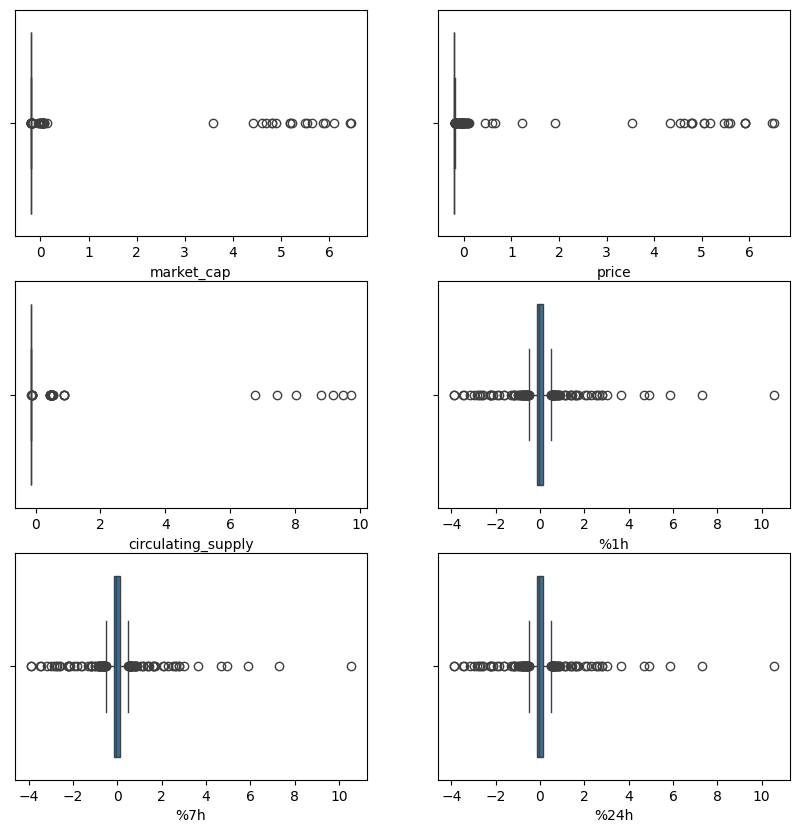

In [76]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
sns.boxplot(data=halving_01, x="market_cap", ax=axs[0, 0])
sns.boxplot(data=halving_01, x="price", ax=axs[0, 1])
sns.boxplot(data=halving_01, x="circulating_supply", ax=axs[1, 0])
sns.boxplot(data=halving_01, x="%1h", ax=axs[1, 1])
sns.boxplot(data=halving_01, x="%7h", ax=axs[2, 0])
sns.boxplot(data=halving_01, x="%24h", ax=axs[2, 1])
plt.show()

In [77]:
df_all_tokens = pd.read_csv("data/clean/df_all_tokens_v3.csv")

In [79]:
df_tokens_class=df_all_tokens[['symbol','class']]

In [81]:
tokens_class = zip(df_tokens_class['symbol'],df_tokens_class['class'])

In [83]:
tokens_class= dict(tokens_class)

In [85]:
halving_01['class'] = halving_01['symbol'].map(tokens_class)

In [ ]:
halving_01['class'] = halving_01['class'].fillna(4)

In [98]:
coin_list = pd.read_json("data/raw/coin_list.json")

In [99]:
coin_list = coin_list[['symbol','platforms']]

In [100]:
coin_list['symbol'] = coin_list['symbol'].apply(lambda x: x.upper())

In [101]:
coin_list['ismultiplatform'] = coin_list['platforms'].apply(lambda x: 1 if len(x) > 0 else 0)

In [102]:
coin_list = coin_list[['symbol','ismultiplatform']]

In [103]:
coin_list = zip(coin_list['symbol'],coin_list['ismultiplatform'])
coin_list  = dict(coin_list)

In [104]:
halving_01['ismultiplatform'] = halving_01['symbol'].map(coin_list)

In [106]:
halving_01.head()

,name,symbol,date,rank,market_cap,price,circulating_supply,%1h,%7h,%24h,class,ismultiplatform
0,Bitcoin,BTC,2013-04-28,-1.378502,6.429477,6.520016,-0.142983,0.063574,0.063574,0.063574,4.0,1.0
1,Litecoin,LTC,2013-04-28,-1.301757,0.134222,0.001099,-0.142183,0.090879,0.090879,0.090879,4.0,0.0
2,Peercoin,PPC,2013-04-28,-1.225013,-0.165805,-0.197785,-0.141973,-0.204352,-0.204352,-0.204352,4.0,1.0
3,Namecoin,NMC,2013-04-28,-1.148268,-0.171389,-0.161606,-0.143731,-0.054177,-0.054177,-0.054177,4.0,0.0
4,Terracoin,TRC,2013-04-28,-1.071523,-0.191392,-0.184713,-0.144138,0.058454,0.058454,0.058454,4.0,1.0


In [108]:
halving_01['ismultiplatform'].isnull().sum()

107

In [109]:
halving_01['ismultiplatform'] = halving_01['ismultiplatform'].fillna(0)

In [110]:
halving_01['ismultiplatform'].isnull().sum()

0

In [111]:
halving_01.to_csv("data/clean/halving_01_v4.csv",index=False)

In [167]:
halving_02 = pd.read_csv("data/clean/halving_02_v3.csv")
halving_03 = pd.read_csv("data/clean/halving_03_v3.csv")
halving_04 = pd.read_csv("data/clean/halving_04_v3.csv")

In [141]:
halving_02.dtypes

rank                    int64
name                   object
symbol                 object
market_cap            float64
price                 float64
circulating_supply    float64
volume_24h            float64
%1h                   float64
%7h                   float64
%24h                  float64
date                   object
dtype: object

In [144]:
halving_03.dtypes

rank                  float64
name                   object
symbol                 object
market_cap            float64
price                 float64
circulating_supply    float64
volume_24h            float64
%1h                   float64
%7h                   float64
%24h                  float64
date                   object
dtype: object

In [145]:
halving_04.dtypes

rank                    int64
name                   object
symbol                 object
market_cap            float64
price                 float64
circulating_supply    float64
volume_24h            float64
%1h                   float64
%7h                   float64
%24h                  float64
date                   object
dtype: object

In [250]:
halving_02_to_04 = pd.concat([halving_02,halving_03,halving_04])

In [257]:
halving_02_to_04.reset_index(drop=True,inplace=True)

In [252]:
halving_02_to_04.head()

,rank,name,symbol,market_cap,price,circulating_supply,volume_24h,%1h,%7h,%24h,date
0,1.0,Bitcoin,BTC,1.022900e+10,649.360000,1.575244e+07,1.025318e+08,0.17,-0.47,-2.10,2016-07-10
1,2.0,Ethereum,ETH,8.962038e+08,10.950000,8.186286e+07,5.479245e+06,0.71,0.41,-6.89,2016-07-10
2,3.0,XRP,XRP,2.359032e+08,0.006674,3.534597e+10,5.710471e+05,0.19,0.07,-2.43,2016-07-10
3,4.0,Litecoin,LTC,1.910427e+08,4.099800,4.659775e+07,3.039615e+06,0.11,-1.03,-4.35,2016-07-10
4,5.0,The,DAO,1.148717e+08,0.099560,1.153837e+09,6.176618e+05,0.33,1.14,9.96,2016-07-10


In [253]:
halving_02_to_04.dtypes

rank                  float64
name                   object
symbol                 object
market_cap            float64
price                 float64
circulating_supply    float64
volume_24h            float64
%1h                   float64
%7h                   float64
%24h                  float64
date                   object
dtype: object

In [254]:
halving_02_to_04.shape

(117144, 11)

In [255]:
halving_02_to_04.isnull().sum()

rank                      4
name                      3
symbol                    4
market_cap             9296
price                   173
circulating_supply     4732
volume_24h            13755
%1h                      79
%7h                    1410
%24h                   2042
date                      0
dtype: int64

In [256]:
halving_02_to_04.dropna(inplace=True)

In [258]:
halving_02_to_04.shape

(92282, 11)

In [259]:
numeric=halving_02_to_04.select_dtypes(include=['float64','int64'])
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric)
numeric_scaled = pd.DataFrame(numeric_scaled,columns=numeric.columns)
halving_02_to_04.drop(columns=numeric.columns,inplace=True)
halving_02_to_04 = pd.concat([halving_02_to_04,numeric_scaled],axis=1)

In [262]:
halving_02_to_04['class'] = halving_02_to_04['symbol'].map(tokens_class)
halving_02_to_04['class'] = halving_02_to_04['class'].fillna(4)
halving_02_to_04['ismultiplatform'] = halving_02_to_04['symbol'].map(coin_list)
halving_02_to_04['ismultiplatform'] = halving_02_to_04['ismultiplatform'].fillna(0)


In [263]:
halving_02_to_04['class'] = halving_02_to_04['class'].astype('object')
halving_02_to_04['ismultiplatform'] = halving_02_to_04['ismultiplatform'].astype('object')

In [264]:
halving_02_to_04.head()

,name,symbol,date,rank,market_cap,price,circulating_supply,volume_24h,%1h,%7h,%24h,class,ismultiplatform
0,Bitcoin,BTC,2016-07-10,-1.344634,1.128958,0.351651,-0.066697,0.035421,-0.002128,-0.040551,-0.069267,4.0,1.0
1,Ethereum,ETH,2016-07-10,-1.343051,0.071937,-0.040338,-0.062407,-0.033380,0.038748,-0.029452,-0.097650,4.0,1.0
2,XRP,XRP,2016-07-10,-1.341469,-0.002847,-0.047057,2.225967,-0.036860,-0.000614,-0.033740,-0.071222,4.0,1.0
3,Litecoin,LTC,2016-07-10,-1.339886,-0.007928,-0.044544,-0.064695,-0.035110,-0.006670,-0.047613,-0.082599,4.0,0.0
4,The,DAO,2016-07-10,-1.338304,-0.016555,-0.047000,0.007156,-0.036827,0.009984,-0.020246,0.002194,4.0,1.0


In [260]:
halving_02_to_04.isnull().sum()

name                  0
symbol                0
date                  0
rank                  0
market_cap            0
price                 0
circulating_supply    0
volume_24h            0
%1h                   0
%7h                   0
%24h                  0
dtype: int64

In [265]:
halving_02_to_04.to_csv("data/clean/halving_02_to_04_v2.csv",index=False)